First 5 rows of the dataset:
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0   

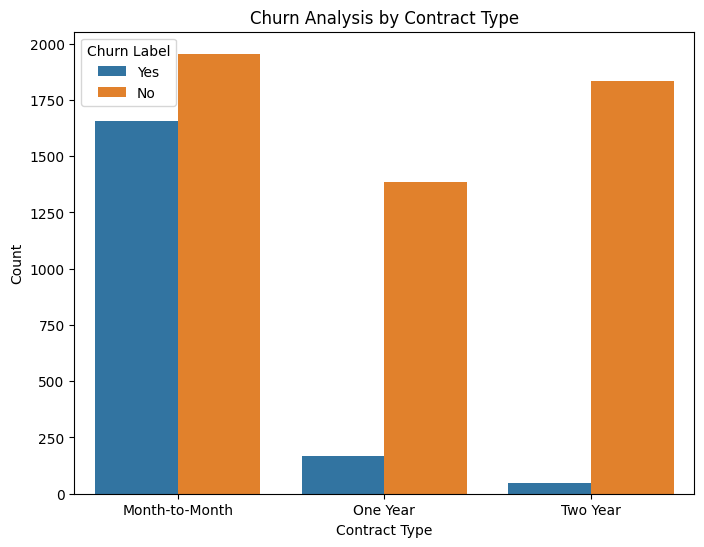

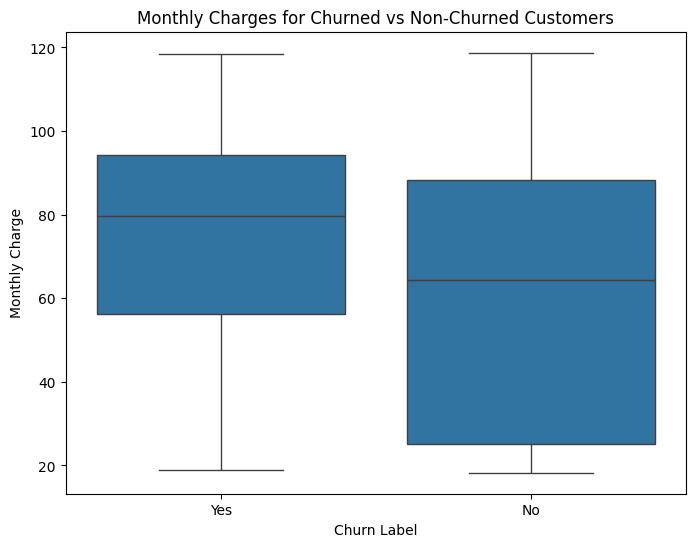

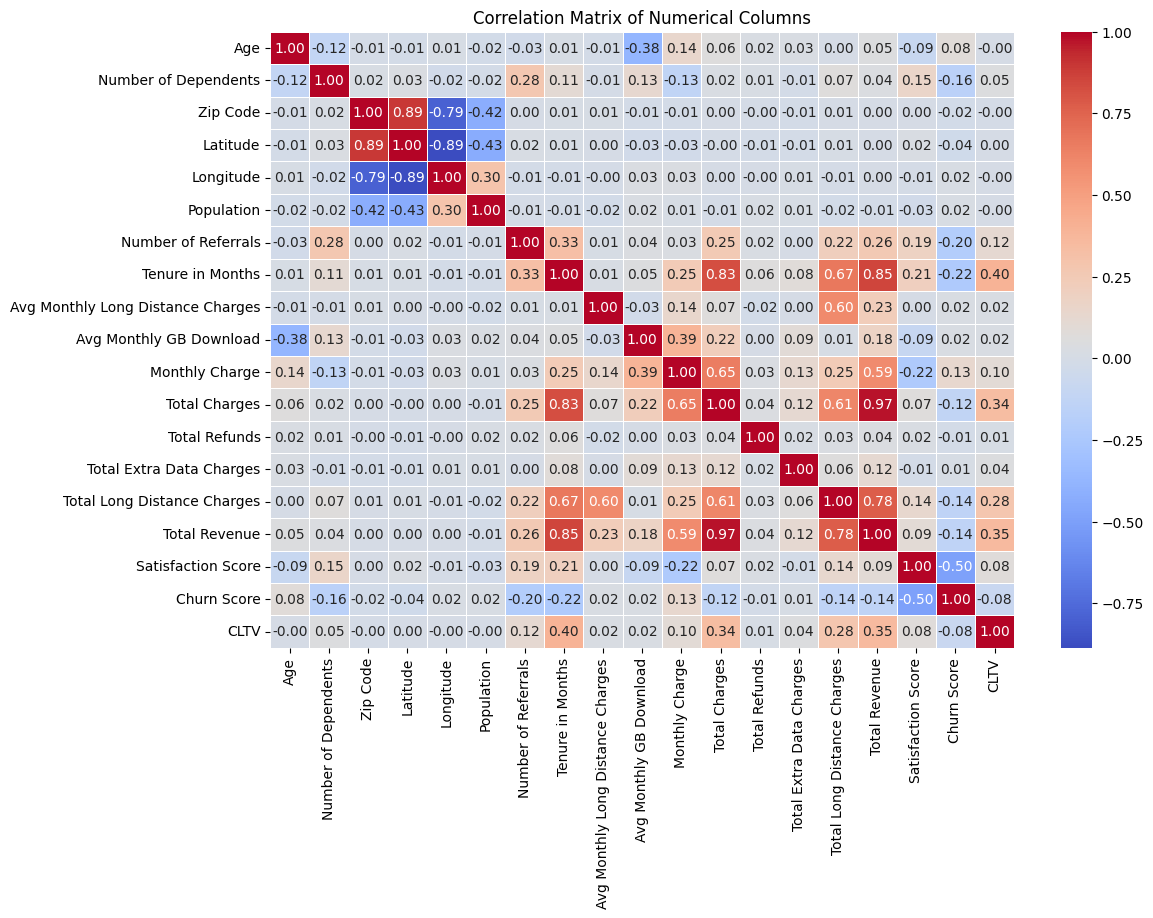

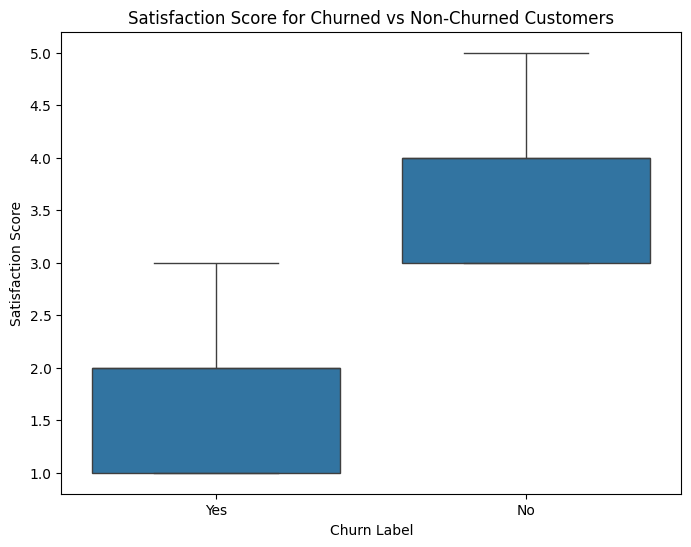


Value counts for Customer ID:
Customer ID
3186-AJIEK    1
8779-QRDMV    1
7495-OOKFY    1
4807-IZYOZ    1
1471-GIQKQ    1
             ..
3445-HXXGF    1
0390-DCFDQ    1
4412-YLTKF    1
4846-WHAFZ    1
4598-XLKNJ    1
Name: count, Length: 7043, dtype: int64

Value counts for Gender:
Gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for Under 30:
Under 30
No     5642
Yes    1401
Name: count, dtype: int64

Value counts for Senior Citizen:
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Value counts for Married:
Married
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Value counts for Country:
Country
United States    7043
Name: count, dtype: int64

Value counts for State:
State
California    7043
Name: count, dtype: int64

Value counts for City:
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Fr

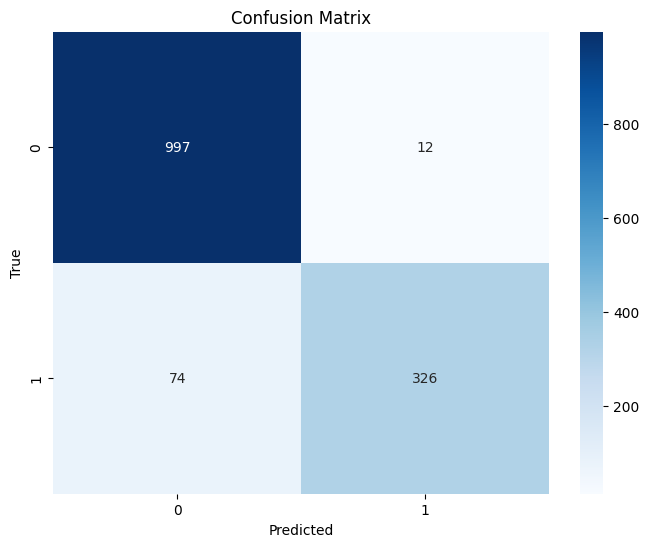

In [1]:
# Importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Reading csv
df = pd.read_csv('telco.csv')

print("First 5 rows of the dataset:")
print(df.head())
# Fetching na values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

numeric = df.select_dtypes(include=['number']).columns
categorical = df.select_dtypes(include=['object']).columns

df[numeric] = df[numeric].fillna(df[numeric].median())
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

# Statistical summary and plotting

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nData Types of Columns:")
print(df.dtypes)

churned_customers = df[df['Churn Label'] == 'Churned']
print(f"\nNumber of churned customers: {len(churned_customers)}")
print(f"Churn rate: {len(churned_customers) / len(df) * 100:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn Label')
plt.title('Churn Analysis by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn Label', y='Monthly Charge')
plt.title('Monthly Charges for Churned vs Non-Churned Customers')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charge')
plt.show()

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn Label', y='Satisfaction Score')
plt.title('Satisfaction Score for Churned vs Non-Churned Customers')
plt.xlabel('Churn Label')
plt.ylabel('Satisfaction Score')
plt.show()

for column in categorical:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())

df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Under 30', '30-50', 'Above 50'])
print("\nNew Age Group column added:")
print(df[['Age', 'Age Group']].head())

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Churn Label'] = label_encoder.fit_transform(df['Churn Label'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Offer'] = label_encoder.fit_transform(df['Offer'])

features = ['Age', 'Tenure in Months', 'Monthly Charge', 'Satisfaction Score', 'Contract', 'Payment Method']
target = 'Churn Label'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
